<a href="https://colab.research.google.com/github/javier-jaime/Stock_Price_Forecasting/blob/main/Natural_Gas_Price_Forecasting_with_yfinance_and_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Natural Gas Future Price Forecasting with yfinance and Facebook Prophet**

## Importing all the necessary Libraries

In [1]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import plotly.express as px
from fbprophet import Prophet
import plotly.io as pio
pio.renderers.default='colab'

     |████████████████████████████████| 6.3 MB 7.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=6144cbd44deb10b8c837ac52c19c78495bb3a283f1399acb3247a06a2e3f8ac3
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


## Importing the Dataset & Exploring it

In [2]:
# Stock Ticker Input
stock = input('Enter the stock ticker: ')
print(f'You entered {stock}, here is the data from the last 10 days:')
period = '1y'
ticker = yf.Ticker(stock)
data = ticker.history(period)
data.reset_index(inplace=True)
data.tail(10)

Enter the stock ticker: NG=F
You entered NG=F, here is the data from the last 10 days:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
239,2021-10-04,5.628,6.064,5.628,5.766,209582,0,0
240,2021-10-05,5.830,6.392,5.790,6.312,219522,0,0
241,2021-10-06,6.321,6.466,5.663,5.675,274653,0,0
242,2021-10-07,5.710,5.835,5.393,5.677,239503,0,0
243,2021-10-08,5.761,5.876,5.548,5.565,163349,0,0
244,2021-10-11,5.695,5.799,5.308,5.345,188699,0,0
245,2021-10-12,5.408,5.523,5.168,5.505,215447,0,0
246,2021-10-13,5.456,5.693,5.350,5.590,198786,0,0
247,2021-10-14,5.676,5.964,5.604,5.687,169162,0,0
248,2021-10-15,5.641,5.789,5.400,5.422,175248,0,0


In [3]:
print('These are the basic stats:')
data.describe()

These are the basic stats:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.0,249.0
mean,3.331478,3.418177,3.261478,3.338731,134314.337349,0.0,0.0
std,0.898580,0.950590,0.862770,0.901111,55293.181422,0.0,0.0
min,2.311000,2.343000,2.238000,2.305000,32233.000000,0.0,0.0
25%,2.694000,2.755000,2.648000,2.701000,100807.000000,0.0,0.0
50%,2.961000,3.015000,2.911000,2.961000,128968.000000,0.0,0.0
75%,3.772000,3.875000,3.734000,3.830000,163349.000000,0.0,0.0
max,6.321000,6.466000,5.790000,6.312000,338968.000000,0.0,0.0


# Data Visualization (plotly express) - Visualizing the historical performance

In [4]:
#Line graph (Price), Area graph (Volume) , box plot (Analyzing price and volume)

In [5]:
px.line(data, x="Date", y="Close", title=f'{stock} Stock Close Price')

In [6]:
px.bar(data, x="Date", y="Volume", title=f'{stock} Stock Volume')

In [7]:
px.box(data, y="Close", title=f'{stock} box plot', height=500, width=500)

## Data Preparation for Facebook Prophet

In [8]:
columns=['Date','Close']
prophet_df=pd.DataFrame(data,columns=columns)
prophet_df= prophet_df.rename(columns={'Date':'ds','Close':'y'})  
prophet_df.tail()

,ds,y
244,2021-10-11,5.345
245,2021-10-12,5.505
246,2021-10-13,5.590
247,2021-10-14,5.687
248,2021-10-15,5.422


## Creating Facebook Prophet Model

In [9]:
m=Prophet(yearly_seasonality=True)
m.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [10]:
periods = 30
future=m.make_future_dataframe(periods)

In [11]:
forecast=m.predict(future)

In [12]:
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-10-19,2.120319,2.832534,3.179184,2.120319,2.120319,0.886950,0.886950,0.886950,-0.146085,-0.146085,-0.146085,1.033036,1.033036,1.033036,0.0,0.0,0.0,3.007269
1,2020-10-20,2.127747,2.859306,3.204627,2.127747,2.127747,0.905439,0.905439,0.905439,-0.128190,-0.128190,-0.128190,1.033630,1.033630,1.033630,0.0,0.0,0.0,3.033186
2,2020-10-21,2.135175,2.868945,3.206881,2.135175,2.135175,0.905128,0.905128,0.905128,-0.128193,-0.128193,-0.128193,1.033321,1.033321,1.033321,0.0,0.0,0.0,3.040303
3,2020-10-22,2.142604,2.882500,3.218247,2.142604,2.142604,0.903758,0.903758,0.903758,-0.128260,-0.128260,-0.128260,1.032018,1.032018,1.032018,0.0,0.0,0.0,3.046362
4,2020-10-23,2.150032,2.868349,3.218059,2.150032,2.150032,0.887727,0.887727,0.887727,-0.141914,-0.141914,-0.141914,1.029641,1.029641,1.029641,0.0,0.0,0.0,3.037759
5,2020-10-26,2.172317,2.882512,3.204300,2.172317,2.172317,0.869322,0.869322,0.869322,-0.146085,-0.146085,-0.146085,1.015408,1.015408,1.015408,0.0,0.0,0.0,3.041639
6,2020-10-27,2.179745,2.881824,3.231513,2.179745,2.179745,0.879952,0.879952,0.879952,-0.128190,-0.128190,-0.128190,1.008143,1.008143,1.008143,0.0,0.0,0.0,3.059698
7,2020-10-28,2.187174,2.882679,3.229761,2.187174,2.187174,0.871382,0.871382,0.871382,-0.128193,-0.128193,-0.128193,0.999575,0.999575,0.999575,0.0,0.0,0.0,3.058556
8,2020-10-29,2.194602,2.874421,3.220557,2.194602,2.194602,0.861440,0.861440,0.861440,-0.128260,-0.128260,-0.128260,0.989701,0.989701,0.989701,0.0,0.0,0.0,3.056042
9,2020-10-30,2.202030,2.857716,3.207526,2.202030,2.202030,0.836616,0.836616,0.836616,-0.141914,-0.141914,-0.141914,0.978529,0.978529,0.978529,0.0,0.0,0.0,3.038646


In [13]:
px.line(forecast, x='ds',y='yhat', title=f'{stock} Stock Forecast')

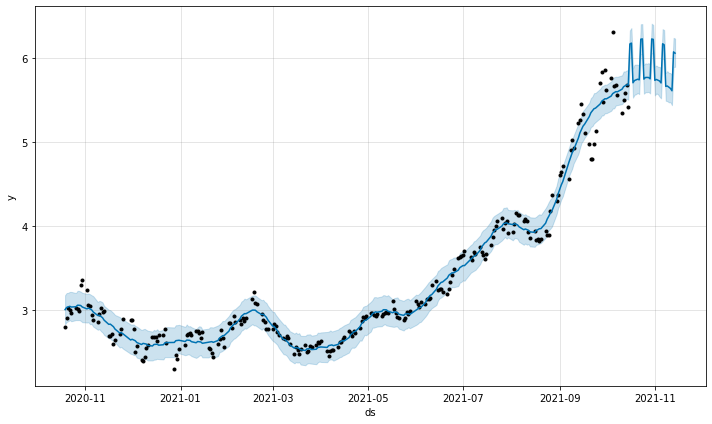

In [14]:
figure=m.plot(forecast, xlabel='ds', ylabel='y')

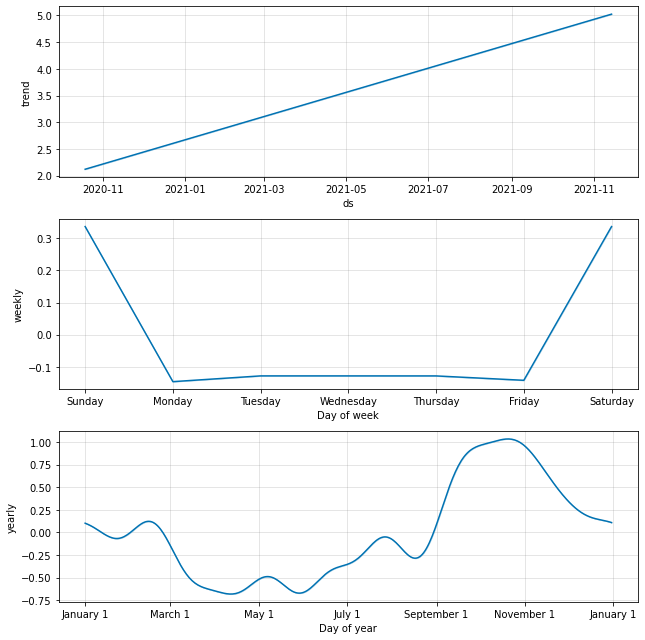

In [15]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [16]:
from google.colab import files
forecast.to_csv(f'{stock}_forecast.csv')
files.download(f'{stock}_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>